Kryptoměny
In [ ]:
import requests

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/crypto_prices.csv")
open("crypto_prices.csv", "wb").write(r.content)
V souboru crypto_prices.csv najdeš ceny různých kryptoměn v průběhu času. Datum je ve sloupci Date a název kryptoměny ti prozradí sloupec Name, alternativně můžeš využít sloupec Symbol.
Použij zavírací cenu kryptoměny (sloupec Close) a vypočti procentuální změnu jednotlivých kryptoměn. Pozor na to, ať se ti nepočítají ceny mezi jednotlivými měnami. Ošetřit to můžeš pomocí metody groupby(), jako jsme to dělali např. u metody shift().

Vytvoř korelační matici změn cen jednotlivých kryptoměn a zobraz je jako tabulku.

V tabulce vyber dvojici kryptoměn s vysokou hodnotou koeficientu korelace a jinou dvojici s koeficientem korelace blízko 0.

Změny cen pro dvojice měn, které jsou hodně a naopak málo korelované, si zobraz jako bodový graf.

Takto nějak by měla vypadat korelační matice, ke které dojdeš.

In [1]:
import requests

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/crypto_prices.csv")
open("crypto_prices.csv", "wb").write(r.content)

5312466

In [2]:
import pandas as pd
import statistics
from scipy import stats
from scipy.stats import gmean
import seaborn
import matplotlib.pyplot as plt

In [3]:
crypto_prices = pd.read_csv('crypto_prices.csv')


In [4]:
crypto_prices = pd.DataFrame(data = crypto_prices)

In [5]:
crypto_prices = crypto_prices.sort_values(['Date'])

In [6]:
 crypto_prices['Change'] = crypto_prices.groupby(['Name'])['Close'].pct_change()


In [7]:
crypto_prices = crypto_prices.pivot(index="Date", columns="Symbol", values="Change")

In [8]:
crypto_prices_corr = crypto_prices.corr()
crypto_prices_corr

Symbol,AAVE,ADA,ATOM,BNB,BTC,CRO,DOGE,DOT,EOS,ETH,...,SOL,TRX,UNI,USDC,USDT,WBTC,XEM,XLM,XMR,XRP
Symbol,,,,,,,,,,,,,,,,,,,,,
AAVE,1.000000,0.470722,0.562494,0.399696,0.431446,0.343820,0.127263,0.554545,0.427624,0.651894,...,0.515869,0.449058,0.691837,-0.006949,0.078976,0.431375,0.416172,0.330575,0.425136,0.400106
ADA,0.470722,1.000000,0.562723,0.422165,0.502847,0.340270,0.274591,0.547938,0.504866,0.569384,...,0.362122,0.457651,0.501810,-0.082321,-0.043924,0.596042,0.467531,0.603466,0.540161,0.545768
ATOM,0.562494,0.562723,1.000000,0.499179,0.513050,0.391860,0.209949,0.594291,0.569255,0.589258,...,0.401478,0.506927,0.499218,-0.050558,-0.020253,0.468501,0.507507,0.513043,0.548324,0.436337
BNB,0.399696,0.422165,0.499179,1.000000,0.540271,0.334792,0.198944,0.466563,0.445958,0.515003,...,0.423526,0.375593,0.370999,-0.076940,-0.044112,0.557039,0.342316,0.350552,0.452686,0.345774
BTC,0.431446,0.502847,0.513050,0.540271,1.000000,0.409889,0.369433,0.552648,0.594179,0.515585,...,0.317901,0.475390,0.448729,-0.088752,-0.026281,0.930797,0.378874,0.374586,0.491680,0.360707
CRO,0.343820,0.340270,0.391860,0.334792,0.409889,1.000000,0.119545,0.454812,0.352358,0.365251,...,0.339714,0.322465,0.370527,-0.047451,-0.054682,0.353116,0.354995,0.335526,0.335806,0.298461
DOGE,0.127263,0.274591,0.209949,0.198944,0.369433,0.119545,1.000000,0.165520,0.289221,0.241974,...,0.090548,0.223658,0.058113,-0.016725,-0.007648,0.248418,0.206659,0.296985,0.217400,0.251765
DOT,0.554545,0.547938,0.594291,0.466563,0.552648,0.454812,0.165520,1.000000,0.507172,0.626813,...,0.392337,0.517055,0.592486,-0.062713,-0.012027,0.567843,0.471581,0.406538,0.476759,0.374119
EOS,0.427624,0.504866,0.569255,0.445958,0.594179,0.352358,0.289221,0.507172,1.000000,0.678572,...,0.305488,0.513045,0.425042,-0.045737,-0.111437,0.628566,0.474167,0.532179,0.567117,0.549968


<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

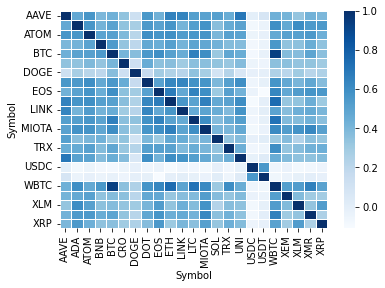

In [9]:
seaborn.heatmap(crypto_prices_corr,annot= False, cmap="Blues",linewidths=1)

C:\Users\dhrickova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


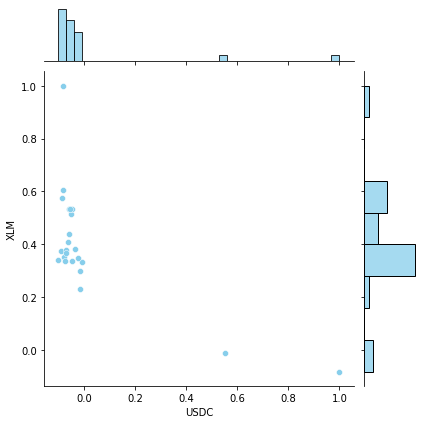

In [10]:
seaborn.jointplot("USDC","XLM",crypto_prices_corr,kind = "scatter", color = "skyblue")

C:\Users\dhrickova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


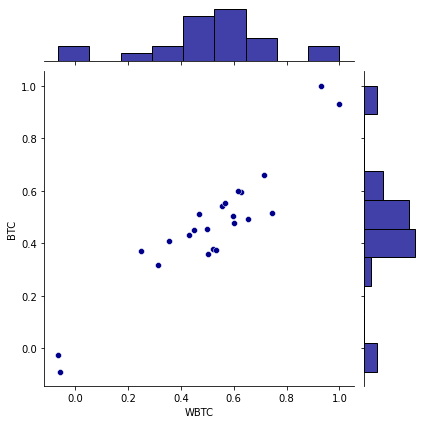

In [11]:
seaborn.jointplot("WBTC","BTC",crypto_prices_corr,kind = "scatter", color = "darkblue")